In [1]:
%%capture
!pip install tensorflow
!pip install keras

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as sk
import sklearn.model_selection
import random
import os

### Preprocessing

In [2]:
df = pd.read_csv('train.csv')
print(df['Tweet'])

0        It's the everything else that's complicated. #...
1        Eren sent a glare towards Mikasa then nodded a...
2        I posted a new photo to Facebook http://fb.me/...
3        #jan Idiot Chelsea Handler Diagnoses Trump Wit...
4        Pedophile Anthony Weiner is TERRIFIED of Getti...
                               ...                        
11963                                     11:11 meet harry
11964    If BBC Food disappears the loss of knowledge w...
11965    Look What Liberals Did to This Historic Monume...
11966    I uploaded a new track, "Everyday Lite 1", on ...
11967    Trump should be declared the victor by about 9...
Name: Tweet, Length: 11968, dtype: object


In [3]:
import re
import string
string.punctuation

def replace_links(text):
  url_regex = "https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,}"
  return re.sub(url_regex, '[URLLINK]', text)

In [4]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  res = [idx for idx in filtered_words if not re.findall("[^\u0000-\u05C0\u2100-\u214F]+", idx)]
  return " ".join(res)

df['Tweet'] = df['Tweet'].map(lambda s:preprocess(s)) 
df['Tweet'] = df['Tweet'].apply(lambda x: replace_links(x))
df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','')
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z ]', '')
df['Tweet'] = df['Tweet'].str.replace('_',' ')
print(df['Tweet'])

df['is_spam'] = df['Type'].map({"Quality": 0, "Spam":1})

# Splitting into training and test datasets
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(df['Tweet'], df['is_spam'], test_size=0.2,random_state=42)

X_train_not = X_train[y_train.isin([0])]
X_train_spam = X_train[y_train.isin([1])]

text_not = X_train_not.str.pad(width=240, side='right', fillchar=' ').str.cat(sep=' ')
text_spam = X_train_spam.str.pad(width=240, side='right', fillchar=' ').str.cat(sep=' ')

# print(text_not[0:500])
# print(text_spam[0:500])
print('Length of text_not: {} characters'.format(len(text_not)))
print('Length of text_spam: {} characters'.format(len(text_spam)))

# The unique characters in the file
vocab_not = sorted(set(text_not))
vocab_spam = sorted(set(text_spam))

print('{} unique characters (not)'.format(len(vocab_not)))
print('{} unique characters (spam)'.format(len(vocab_spam)))
print('vocab_not:', vocab_not)
print('vocab_spam:', vocab_spam)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OwnerDell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\OwnerDell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        everything else complicated pesummit pxpic twi...
1        eren sent glare towards mikasa nodded stood he...
2                                posted new photo facebook
3        jan idiot chelsea handler diagnoses trump disease
4        pedophile anthony weiner terrified getting bea...
                               ...                        
11963                                           meet harry
11964      bbc food disappears loss knowledge catastrophic
11965              look liberals historic monument arizona
11966    uploaded new track everyday lite spreaker lite...
11967    trump declared victor tonight based exit poll ...
Name: Tweet, Length: 11968, dtype: object
Length of text_not: 1194154 characters
Length of text_spam: 1113232 characters
27 unique characters (not)
27 unique characters (spam)
vocab_not: [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
vocab_spam: [' ', 'a', 'b', 

In [5]:
# Map characters to their indices in vocabulary.
char2index_not = {char: index for index, char in enumerate(vocab_not)}
char2index_spam = {char: index for index, char in enumerate(vocab_spam)}

# print('{')
# for char, _ in zip(char2index, range(20)):
#     print('  {:4s}: {:3d},'.format(repr(char), char2index[char]))
# print('  ...\n}')

# Map character indices to characters from vocabulary.
index2char_not = np.array(vocab_not)
index2char_spam = np.array(vocab_spam)
print(index2char_not)

# Convert chars in text to indices.
text_as_int_not = np.array([char2index_not[char] for char in text_not])
text_as_int_spam = np.array([char2index_spam[char] for char in text_spam])
print('{} --> {}'.format(repr(text_spam[:15]), repr(text_as_int_spam[:15])))

[' ' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q'
 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
'push power hits' --> array([16, 21, 19,  8,  0, 16, 15, 23,  5, 18,  0,  8,  9, 20, 19])


### Generator

In [6]:
# The maximum length sentence we want for a single input in characters.
sequence_length = 240
examples_per_epoch_not = len(text_not) // (sequence_length + 1)
examples_per_epoch_spam = len(text_spam) // (sequence_length + 1)

print('examples_per_epoch (not):', examples_per_epoch_not)
print('examples_per_epoch (spam):', examples_per_epoch_spam)

# Create training dataset.
char_dataset_not = tf.data.Dataset.from_tensor_slices(text_as_int_not)
char_dataset_spam = tf.data.Dataset.from_tensor_slices(text_as_int_spam)

# Generate batched sequences out of the char_dataset.
sequences_not = char_dataset_not.batch(sequence_length + 1, drop_remainder=True)
sequences_spam = char_dataset_spam.batch(sequence_length + 1, drop_remainder=True)

# Sequences size is the same as examples_per_epoch.
print('Sequences count (not): {}'.format(len(list(sequences_not.as_numpy_iterator()))));
print('Sequences count (spam): {}'.format(len(list(sequences_spam.as_numpy_iterator()))));
print()

# Sequences examples (spam).
for item in sequences_spam.take(3): print(repr(''.join(index2char_spam[item.numpy()])))

examples_per_epoch (not): 4954
examples_per_epoch (spam): 4619
Sequences count (not): 4954
Sequences count (spam): 4619

'push power hits hit songs genres                                                                                                                                                                                                                 '
'selling drugs facebook easy case police pull                                                                                                                                                                                                     '
'brazil enlists army cabinet campaign zika health                                                                                                                                                                                                 '


In [7]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset_not = sequences_not.map(split_input_target)
dataset_spam = sequences_spam.map(split_input_target)

# Batch size.
BATCH_SIZE = 64

# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
BUFFER_SIZE = 10000

dataset_not = dataset_not.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
dataset_spam = dataset_spam.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

print('Batched dataset size (not): {}'.format(len(list(dataset_not.as_numpy_iterator()))))
print('Batched dataset size (spam): {}'.format(len(list(dataset_spam.as_numpy_iterator()))))

for input_text, target_text in dataset_spam.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

Batched dataset size (not): 77
Batched dataset size (spam): 72
1st batch: input_text: tf.Tensor(
[[ 0  0  0 ...  0  0  0]
 [ 7 18  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [20 18 21 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]], shape=(64, 240), dtype=int32)

1st batch: target_text: tf.Tensor(
[[ 0  0  0 ...  0  0  0]
 [18  1 25 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [18 21 13 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]], shape=(64, 240), dtype=int32)


In [8]:
# Length of the vocabulary in chars.
vocab_size_not = len(vocab_not)
vocab_size_spam = len(vocab_spam)

# The embedding dimension.
embedding_dim = 256

# Number of RNN units.
rnn_units = 1024

def build_model(vocab_size, embedding_dim, rnn_units, BATCH_SIZE):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      batch_input_shape=[BATCH_SIZE, None]
    ))

    model.add(tf.keras.layers.LSTM(
      units=rnn_units,
      return_sequences=True,
      stateful=True,
      recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size))
  
    return model

In [9]:
model_not = build_model(vocab_size_not, embedding_dim, rnn_units, BATCH_SIZE)
model_spam = build_model(vocab_size_spam, embedding_dim, rnn_units, BATCH_SIZE)

# keras.utils.vis_utils.pydot = pydotplus
# plot_model(
#     model_spam,
#     show_shapes=True,
#     show_layer_names=True,
# )

In [10]:
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_spam.compile(
    optimizer=adam_optimizer,
    loss=loss
)

In [11]:
# Directory where the checkpoints will be saved.
checkpoint_dir = 'tmp_3/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

#### Training Model - Spam

Epoch 1/45
72/72 [==============================] - 815s 11s/step - loss: 0.9865
Epoch 2/45
72/72 [==============================] - 1259s 17s/step - loss: 0.7503
Epoch 3/45
72/72 [==============================] - 1106s 15s/step - loss: 0.6988
Epoch 4/45
72/72 [==============================] - 1086s 15s/step - loss: 0.6542
Epoch 5/45
72/72 [==============================] - 856s 12s/step - loss: 0.6328
Epoch 6/45
72/72 [==============================] - 880s 12s/step - loss: 0.6182
Epoch 7/45
72/72 [==============================] - 984s 14s/step - loss: 0.6076
Epoch 8/45
72/72 [==============================] - 1173s 16s/step - loss: 0.5979
Epoch 9/45
72/72 [==============================] - 1088s 15s/step - loss: 0.5892
Epoch 10/45
72/72 [==============================] - 981s 14s/step - loss: 0.5811
Epoch 11/45
72/72 [==============================] - 937s 13s/step - loss: 0.5731
Epoch 12/45
72/72 [==============================] - 890s 12s/step - loss: 0.5642
Epoch 13/45
72/72 [=

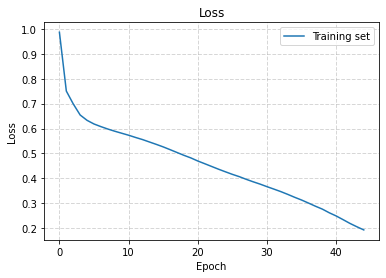

In [12]:
with tf.device('/device:GPU:0'):
    EPOCHS=45
    history = model_spam.fit(
      x = dataset_spam,
      epochs = EPOCHS,
      callbacks = [
        checkpoint_callback
      ]
    )

def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

render_training_history(history)

#### Generating Text - Spam

In [13]:
tf.train.latest_checkpoint(checkpoint_dir)

simplified_batch_size = 1

model_spam = build_model(vocab_size_spam, embedding_dim, rnn_units, BATCH_SIZE=1)

model_spam.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model_spam.build(tf.TensorShape([simplified_batch_size, None]))

In [14]:
# num_generate
# - number of characters to generate.
#
# temperature
# - Low temperatures results in more predictable text.
# - Higher temperatures results in more surprising text.
# - Experiment to find the best setting.
def generate_text(model, start_string, char2index, index2char, num_generate = 240, temperature=1.0):
    # Evaluation step (generating text using the learned model)

    # Converting our start string to numbers (vectorizing).
    input_indices = [char2index[s] for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)

    # Empty string to store our results.
    text_generated = []

    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
        predictions,
        num_samples=1
        )[-1,0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)

        text_generated.append(index2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [19]:
first_spam = X_train_spam.str.split().str[:3].str.join(sep=" ")
# Generate the text with default temperature (1.0).
for idx, row in enumerate(first_spam[0:10]):
  print(generate_text(model_spam, start_string=" ", char2index = char2index_spam, index2char = index2char_spam))

                                     china opanands speaks see hillary clinton consisale pringerson                                                                                                                                              
                  playing someone guy savedy face holder election                                                                                                                                                                                
                       meet regille minuten unprecters sex years social secretive yrashcast                                                                                                                                                      
                            leterand engense genewa mother major purpler confirmed sonicce detaired keren cut lies                                                                                                                               
               topnews politicus

In [20]:
spam = []
first_spam = (X_train_spam.str.split().str[:2].str.join(sep=" ")).sample(frac=1)
# Generate the text with default temperature (1.0).
for idx, row in enumerate(first_spam[0:1250]):
    if idx % 500 == 0: print(idx)
    spam.append(generate_text(model_spam, start_string=" ", char2index = char2index_not, index2char = index2char_not))

spam_df = pd.DataFrame(spam, columns = ['Tweet'])

from pathlib import Path
filepath = Path('output/spam.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
spam_df.to_csv(filepath)

0
500
1000
